> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

This data set contains information just over 10,000 movies collected from The Movie Database (TMDb). It was downloaded [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv). Below is a data dictionary and assumptions made as I was not able to find enough information for each column.

- **id:** unique identifier in this dataset.
- **imdb_id:** unique identifer on imdb website.
- **popularity:** see definition [here](https://developers.themoviedb.org/3/getting-started/popularity). 
- **budget:** this is expressed in nominal U.S dollars. 
- **revenue:** this is expressed in nominal U.S dollars.
- **original_title:** title of the movie when it was initally released.
- **cast:** list of actors and actresses separated by '|'.
- **homepage:** homepage of movie.
- **director:** director of movie.
- **tagline:** tagline promoting the movie.
- **keywords:** words used to describe the film.
- **overview:** short description of what the movie is about.
- **run-time**: duration of the movie.
- **genres:** category types associated with the movie (Eg. thriller, fantasy, action, etc). Separated by '|'.
- **production_companies:** companies involved in the production of the movie, separated by '|'. 
- **release_date:** expressed in 'mm/dd/yyyy'.
- **vote_count:** how many votes contributed to the movie rating out of 10.
- **vote_average:** average rating out of 10, with 1 being least favourable and 10 being most favourable.
- **release_year:** expressed in 'yyyy'. Assumed to be the year the movie was initally released and does not include when it was last re-released.
- **budget_adj:** assumed to be expresed in terms of 2010 U.S dollars (ie. adjustment for inflation over time).
- **revenue_adj:** assumed to be expressed in in terms of 2010 U.S dollars (ie. adjustment for inflation over time).

### Investigation

Movies these days are always looking to outdo their predecessors in terms of commercial success. Movie production companies are also looking to maximise the use of their resources (physical and monetary) to generate the most profit. 

For this analysis I've decided to use the adjusted net profit (`revenue_adj` - `budget_adj`) as a a measure of box office success. In my view, if a movie generates a lot of revenue, it does not mean it has been a commercial success if it is very costly to make. 

By the same token, just because movies have generated a lot of net profit doesn't mean the Return On Investment (ROI) was spectacular. For example, if you've generated \$120 million in net profit but it cost \$100 million to make, then your ROI is for every \$1 invested, it generated $1.20 back. As an investor or production company, you should not ignore movies that have excellent ROI that are cheaper to make. They are still good investments!

So it is important to strike a balance between generated large net profit but also prioritising movies that have a strong ROI. As such, the questions that I would like to explore are:

1. For movies with a with a relatively strong net profit, what is their relationship to ROI?
2. When are movies with commercial success (ie. a relatively strong net profit and ROI) likely be be released during the year?
3. Does a movie with a high average rating or popularity normally represent relatively strong financial success? 

Note that I have defined 'relatively' as movies in the top 50% for the median in net profit and ROI. 

In [585]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from datetime import datetime

# Enable visualisations within Jupyter notebook
% matplotlib inline

# This helps display data to two decimal places and inserts a comma separator for large figures in '000s.
pd.options.display.float_format = "{:,.2f}".format

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [586]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('C:/Users/MyTecra/Downloads/Udacity - Data Analytics/Project 3 - Investigate a Dataset/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


#### Initial observations
- Looking at the above first five rows, there are 21 columns and the data under each column reveals that types of possible data formats each are expressed in. 
- `vote_average` seems to represent the movie's rating out of 10 (with 10 being high and 0 being low). This will be a critical field to determine the viewer's assessment of the film for the third question I'm investigating.
- There are `budget`, `revenue`, `budget_adj` and `revenue_adj` columns. These will be critical but I will likely only need the latter two since I want to make meaningful comparison on the financial performance of each film. Numbers would need to be adjusted for inflation to make this happen. The monetary denomination isn't specified so I will assume this is expressed in $USD.
- It looks like the `cast`, `genre` and `production_companies` columns have a list of names or descriptions separated by a '|'. I won't need these fields since it is out of scope.
- I also am not able to see all the column information because there are too many to display.

Let's keep looking...

In [587]:
print(df.shape)
print('')
df.info()

(10866, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj  

The above indicates there are:
- 10866 rows and 21 columns
- The data types for each column seem quite sensible in terms of numeric expressions I'd expect to see (eg. runtime, vote average, vote_count, budget, revenue, etc) being in either float or int. 
- The `release_date` (a string) and `release_year` should be converted to time.
- However, there seem to be a some missing data for `imdb_id`, `cast`, `homepage`, `director`, `tagline`, `keywords`, `overview`, `genres` and `production_companies.` 
- The `keywords` column is the only one I cannot see using head()
- There could also be duplicates so we'll investigate this, the null information further, and what sort of text are in keywords.

Let's take a closer look at each of the data in each column.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [588]:
# Check duplicates
print(df.duplicated().sum())
df[df.duplicated()]

1


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.60,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,"30,000,000.00","967,000.00"


In [589]:
# Only 1 duplicate -let's see what it is
df.query('original_title == "TEKKEN"')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.60,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,"30,000,000.00","967,000.00"
2090,42194,tt0411951,0.60,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,"30,000,000.00","967,000.00"


In [590]:
#The above indicates there is only one duplicate row. So we will drop this.
df.drop_duplicates(keep ='first', inplace=True)
df.duplicated().sum()

0

In [591]:
# convert time
df['release_date'] = pd.to_datetime(df['release_date'])

# create a new field release_month to help answer Question 2 on when highly profitable movies are released.
df['release_month'] = df['release_date'].dt.month
print(df[['release_date','release_year','release_month']].dtypes)
df.tail(2)

release_date     datetime64[ns]
release_year              int64
release_month             int64
dtype: object


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
10864,21449,tt0061177,0.06,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.40,1966,0.00,0.00,11
10865,22293,tt0060666,0.04,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,74,Horror,Norm-Iris,2066-11-15,15,1.50,1966,"127,642.28",0.00,11


The above highlights an anomaly with the `release_date`; the year in it does not match the `release_year`! How can you have a 2066 year for the `release date`? Which is correct? Wikipedia confirms the `release_year` of 1966 is correct for _What's Up Tiger Lily_ and _Manos: The Hands of Fate_. So we'll need to compare the year in `release_date` to `release_year`. I've decided to make the assumption that the year in `release_date` is correct unless it is something completely ridiculous like 2066. If this is the case, then I would need to take the `release_year` as correct and use that as the year for the `release_date`. The below confirms that `release_year` has sensible dates since the maximum year is 2015.

In [592]:
df['release_year'].describe()

count   10,865.00
mean     2,001.32
std         12.81
min      1,960.00
25%      1,995.00
50%      2,006.00
75%      2,011.00
max      2,015.00
Name: release_year, dtype: float64

In [593]:
# Extract the year from release date
df['year_temp'] = df['release_date'].dt.year

# Convert to same data type as release_year for comparison
df['year_temp'] = df['year_temp'].apply(int) 

# Check which years don't look correct.
df['year_temp'].value_counts().sort_index()

1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
2060     32
2061     31
2062     32
2063     34
2064     42
2065     35
2066     46
2067     40
Name: year_temp, dtype: int64

In [594]:
# Now we need to clean up years 2060-2067. We'll use the  release_year for this.
df.loc[df['year_temp'] >= 2060, 'year_temp'] = df['release_year']

#check if fixed 
df['year_temp'].value_counts().sort_index()

1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    489
2011    540
2012    588
2013    659
2014    700
2015    629
Name: year_temp, dtype: int64

In [595]:
# convert to strings for concatenation
df['release_date'] = df['release_date'].astype(str)
df['year_temp'] = df['year_temp'].astype(str)

In [596]:
# remove the year from release date
df['release_date'] = df['release_date'].apply(lambda x: x[4:])

In [597]:
# add the year with the correct one
df['release_date'] = df['year_temp'] + df['release_date']

In [598]:
#check
df['release_date'].value_counts().sort_index()

1960-01-01    2
1960-02-11    1
1960-02-22    1
1960-03-01    1
1960-03-27    1
1960-04-06    1
1960-05-18    1
1960-05-19    1
1960-06-15    1
1960-06-19    1
1960-06-21    1
1960-06-24    1
1960-07-01    1
1960-07-13    1
1960-07-20    1
1960-08-05    1
1960-08-10    1
1960-08-14    1
1960-08-17    1
1960-08-29    1
1960-09-09    1
1960-09-14    1
1960-10-06    1
1960-10-07    1
1960-10-13    1
1960-10-23    1
1960-10-24    1
1960-12-18    1
1960-12-20    1
1960-12-21    1
             ..
2015-11-09    1
2015-11-10    2
2015-11-12    3
2015-11-13    6
2015-11-14    1
2015-11-15    1
2015-11-18    1
2015-11-20    4
2015-11-22    1
2015-11-25    2
2015-11-26    3
2015-11-27    4
2015-12-01    2
2015-12-03    1
2015-12-04    4
2015-12-05    1
2015-12-11    6
2015-12-14    1
2015-12-15    1
2015-12-17    1
2015-12-18    2
2015-12-19    2
2015-12-20    1
2015-12-23    2
2015-12-24    2
2015-12-25    4
2015-12-26    1
2015-12-27    1
2015-12-30    1
2015-12-31    2
Name: release_date, Leng

In [599]:
#convert back to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

#change release_year to match the year in release_date
df['release_year'] = df['release_date'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 23 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj       

In [600]:
#check if min / max release_year is ok
df['release_year'].describe()

count   10,865.00
mean     2,001.32
std         12.81
min      1,960.00
25%      1,995.00
50%      2,006.00
75%      2,011.00
max      2,015.00
Name: release_year, dtype: float64

In [601]:
# How many null values are there in each column?
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
release_month              0
year_temp                  0
dtype: int64

In [602]:
#There are rows with zero dollar values for budget and revenue. Let's remove this.
columns =['budget', 'revenue']

# Replace zero values with NAN and print NA results
df[columns] = df[columns].replace(0, np.NAN)
print(df[columns].isnull().sum())

# Drop rows with NAN for budget_adj and revenue_adj
df.dropna(subset = columns, inplace = True)

print('')
print('Results after removing NA values:')
print(df[columns].isnull().sum())


budget     5696
revenue    6016
dtype: int64

Results after removing NA values:
budget     0
revenue    0
dtype: int64


In [603]:
# No null values against budget, revenue, budget_adj and revenue_adj which is good
# Let's look at the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,"3,854.00","3,854.00","3,854.00","3,854.00","3,854.00","3,854.00","3,854.00","3,854.00","3,854.00","3,854.00","3,854.00"
mean,"39,888.19",1.19,"37,203,696.95","107,686,616.10",109.22,527.72,6.17,"2,001.26","44,239,993.08","137,064,690.30",7.04
std,"67,222.53",1.48,"42,208,224.69","176,539,346.11",19.92,879.96,0.79,11.28,"44,809,254.03","216,111,351.44",3.36
min,5.00,0.00,1.00,2.00,15.00,10.00,2.20,"1,960.00",0.97,2.37,1.00
25%,"6,073.50",0.46,"10,000,000.00","13,600,032.25",95.00,71.00,5.70,"1,995.00","13,090,528.47","18,357,350.36",4.00
50%,"11,321.50",0.80,"24,000,000.00","44,800,002.50",106.00,204.00,6.20,"2,004.00","30,016,111.91","61,730,679.08",7.00
75%,"38,573.25",1.37,"50,000,000.00","124,212,540.75",119.00,580.00,6.70,"2,010.00","60,613,069.68","163,257,654.56",10.00
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",338.00,"9,767.00",8.40,"2,015.00","425,000,000.00","2,827,123,750.41",12.00


In [604]:
#Let's check to see what budgets don't look right. As we are also focussing on return on investment this will be imporant.
df['budget_adj'].nsmallest(n=30)

3581         0.97
2618         1.31
2398         3.00
8944         4.52
10050        5.01
8235         8.59
5852         9.36
8125        11.45
5162        11.85
10297       12.08
5785        14.04
3853        19.39
4675        23.74
10236       31.70
2519        32.73
10777       36.77
9992        50.07
1733        76.23
3968        82.43
3608        90.15
10495      224.80
6179       231.10
7813     6,310.01
3755     7,755.18
7044     8,081.12
7447    15,775.03
3785    16,479.77
2207    30,000.00
2227    30,000.00
1871    31,703.56
Name: budget_adj, dtype: float64

In [605]:
# Some of the numbers below $30k look odd for movie budgets. Need to look at this closer.
df[(df['budget_adj'] <= 30000)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,year_temp
1733,22717,tt1084972,0.28,75.00,134.00,Wanted,Salman Khan|Ayesha Takia|Mahesh Manjrekar|Prak...,http://www.wanted-thefilm.com/,Prabhu Deva,"Mafia wants him DEAD !, Police wants him ALIVE !!",...,Action|Comedy|Crime|Thriller,Sahara One Motion Pictures,2009-09-18,18,4.90,2009,76.23,136.20,9,2009
2207,42296,tt1584016,0.35,"30,000.00","3,045,943.00",Catfish,Megan Faccio|Melody C. Roscher|Ariel Schulman|...,http://www.iamrogue.com/catfish,Henry Joost|Ariel Schulman,Don't let anyone tell you what it is.,...,Documentary,Hit the Ground Running Films,2010-09-17,125,6.40,2010,"30,000.00","3,045,943.00",9,2010
2227,38568,tt1049402,0.28,"30,000.00","617,000.00",Howl,James Franco|Jon Hamm|Mary-Louise Parker|Treat...,http://howlthemovie.com/,Rob Epstein|Jeffrey Friedman,The Obscenity Trial That Started a Revolution....,...,Drama,RabbitBandini Productions|Werc Werk Works,2010-08-26,45,6.80,2010,"30,000.00","617,000.00",8,2010
2398,39356,tt1560139,0.03,3.00,43.00,Boy,James Rolleston|Craig Hall|Taika Waititi|Te Ah...,http://www.boythemovie.co.nz,Taika Waititi,"Summer, Girls, Gangs, Drugs ... its not easy b...",...,Drama|Comedy,New Zealand Film Commission|Unison Films|Whenu...,2010-02-14,26,7.30,2010,3.00,43.00,2,2010
2519,10397,tt0145653,0.35,25.00,13.00,Angela's Ashes,Emily Watson|Robert Carlyle|Joe Breen|Michael ...,NaN,Alan Parker,NaN,...,Drama,Paramount Pictures|Universal Pictures,1999-12-25,24,7.00,1999,32.73,17.02,12,1999
2618,39964,tt0120836,0.09,1.00,100.00,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,NaN,Jeff Pollack,A comedy about a guy who would do anything to ...,...,Comedy|Romance,Alcon Entertainment|Dinamo Entertainment,1999-04-23,14,4.80,1999,1.31,130.91,4,1999
3581,59296,tt1436559,0.52,1.00,"1,378.00","Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,http://www.ifcfilms.com/films/love-wedding-mar...,Dermot Mulroney,Here comes the ride.,...,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,2011-06-03,55,5.30,2011,0.97,"1,335.83",6,2011
3608,50217,tt0893412,0.46,93.00,"2,500,000.00",From Prada to Nada,Camilla Belle|Alexa PenaVega|April Bowlby|Wilm...,http://frompradatonadamovie.com/,Angel Gracia,A riches to rags story.,...,Comedy|Drama|Romance,Lewis Gilbert Productions|Lionsgate|Modern Vid...,2011-01-28,47,5.20,2011,90.15,"2,423,495.11",1,2011
3755,79120,tt1714210,0.24,"8,000.00","469,947.00",Weekend,Tom Cullen|Chris New|Jonathan Race|Laura Freem...,http://weekenderfilm.tumblr.com/,Andrew Haigh,A (sort of) love story between two guys over a...,...,Drama|Romance,EM Media|The Bureau|Glendale Picture Company|S...,2011-09-22,96,7.40,2011,"7,755.18","455,565.70",9,2011
3785,58699,tt1242599,0.20,"17,000.00","101,236.00",Bellflower,Evan Glodell|Jessie Wiseman|Tyler Dawson|Rebek...,http://www.coatwolf.com/,Evan Glodell,A love story with apocalyptic stakes.,...,Action|Drama|Romance,Coatwolf Productions,2011-04-16,24,6.70,2011,"16,479.77","98,137.98",4,2011


The above has interesting results. Karate Kid Part 2 doesn't look right on row 10495. It cost \$113.00 to make and made \$115,103,979.00 in the box office adjusted for inflation? According to Wikipedia, the budget should have been \$13m. To determine the budget adjusted for inflation, I entered $13m into the inflation calculator http://www.usinflationcalculator.com/. According to that, \$13m would cost \$25,864,306.57 in the year 2010.

Paranormal activity checks out according to Wikipedia with its small \$15k budget and phenomenal gross revenue \$193.4m. The other entries do not look material in nature, and as I don't have time to fix them all, I'm going to drop everything below \$15k in budget then so it doesn't distort the ROI figures.

In [606]:
#check the Karate Kid Part 2 is the right index
df.loc[10495]['budget_adj']

224.802924427423

In [607]:
# insert correct figure.
df.replace(to_replace=224.802924427423, value=25864306.57, inplace=True)

#check index again
df.loc[10495]['budget_adj']

25864306.57

In [608]:
# Filter out all budgets less than $15k from the dataset.
df = df[(df['budget_adj'] >= 15000)]

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,"3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00","3,830.00"
mean,"39,864.02",1.20,"37,436,821.54","108,358,776.85",109.27,530.52,6.17,"2,001.26","44,523,962.01","137,919,153.01",7.05
std,"67,287.49",1.48,"42,237,084.35","176,886,703.38",19.86,881.93,0.79,11.29,"44,807,185.80","216,516,824.45",3.36
min,5.00,0.00,113.00,2.00,26.00,10.00,2.20,"1,960.00","15,775.03",2.37,1.00
25%,"6,045.50",0.47,"10,000,000.00","14,002,672.50",96.00,72.00,5.70,"1,995.00","13,343,857.19","18,823,388.37",4.00
50%,"11,286.50",0.80,"24,000,000.00","45,658,770.50",106.00,206.00,6.20,"2,004.00","30,306,534.84","62,308,690.78",7.00
75%,"38,517.75",1.38,"50,000,000.00","124,911,131.50",119.00,582.00,6.70,"2,010.00","60,767,198.03","164,696,185.95",10.00
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",338.00,"9,767.00",8.40,"2,015.00","425,000,000.00","2,827,123,750.41",12.00


In [609]:
#The above shows the budget_adj looks ok. However, revenue_adj minimum value has $2.37. This needs a closer look.

#Let's check to see what revenue doesn't look right
df['revenue_adj'].nsmallest(n=30)

5067         2.37
8142         2.86
3239         3.04
8523         6.95
8226         8.59
10307        9.06
7158        13.85
10294       22.64
5060        27.26
7506        48.38
9332       124.89
6707       155.76
4970       296.34
4668     1,840.60
4611     2,394.31
4495     2,852.08
4591     2,858.73
3621     3,255.24
7602     3,744.99
3752     5,046.69
5704     5,753.80
5586     5,989.68
1780     7,425.82
4540     7,729.97
6948     7,790.18
851      8,582.73
5697     8,631.16
5576     9,123.52
1871    10,164.00
6274    11,488.32
Name: revenue_adj, dtype: float64

In [610]:
# It looks like a lot of the revenue figures are mistated despite complete budget information.
# We'll just have to ignore these unfortunately - they will return a net loss and be filtered out from the analysis.
df[(df['revenue_adj'] <= 30000)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,year_temp
331,245846,tt2325977,0.37,"10,000,000.00","17,472.00",Strangerland,Nicole Kidman|Joseph Fiennes|Hugo Weaving|Lisa...,NaN,Kim Farrant,To find the truth they must lose themselves.,...,Drama|Thriller,Worldview Entertainment,2015-07-01,48,5.00,2015,"9,199,995.95","16,074.23",7,2015
818,242042,tt2355495,0.73,"6,000,000.00","15,071.00",Barefoot,Evan Rachel Wood|Scott Speedman|J.K. Simmons|T...,http://barefootthemovie.com/,Andrew Fleming,She's stepping out into the world.,...,Comedy|Drama|Romance,WhiteFlame Productions,2014-02-02,129,6.50,2014,"5,526,546.30","13,881.76",2,2014
851,254191,tt3177316,0.62,"1,000,000.00","9,318.00",Honeymoon,Rose Leslie|Harry Treadaway|Ben Huber|Hanna Brown,NaN,Leigh Janiak,After the ceremony comes the ritual.,...,Horror,Fewlas Entertainment,2014-09-12,137,5.30,2014,"921,091.05","8,582.73",9,2014
940,244783,tt2182972,0.41,"6,000,000.00","32,251.00",Song One,Anne Hathaway|Johnny Flynn|Mary Steenburgen|Be...,http://songonemovie.tumblr.com/,Kate Barker-Froyland,A moment can change everything.,...,Drama,Worldview Entertainment,2014-01-20,58,5.70,2014,"5,526,546.30","29,706.11",1,2014
1561,31723,tt1247704,0.53,"3,000,000.00","18,097.00",Women in Trouble,Carla Gugino|Adrianne Palicki|Connie Britton|M...,http://www.womenintroublethemovie.com/,Sebastian Gutierrez,"High Hopes, High Anxiety, High Heels.",...,Comedy|Drama,Gato Negro Films,2009-11-13,11,4.50,2009,"3,049,201.30","18,393.80",11,2009
1780,38850,tt1139282,0.22,"2,000,000.00","7,306.00",Stolen Lives,Jon Hamm|Josh Lucas|Rhona Mitra|James Van Der ...,http://www.ifcfilms.com/films/stolen,Anders Anderson,Secrets from the past don't stay buried.,...,Crime|Drama|Mystery|Thriller,Capitol Films|Boy in the Box|2 Bridges Product...,2009-10-10,12,6.00,2009,"2,032,800.87","7,425.82",10,2009
1871,42151,tt1489167,0.09,"31,192.00","10,000.00",Down Terrace,Robert Hill|Robin Hill|Julia Deakin|David Scha...,http://downterrace.blogspot.com/,Ben Wheatley,You're only as good as the people you know.,...,Drama|Action|Comedy,NaN,2009-09-01,15,6.50,2009,"31,703.56","10,164.00",9,2009
3239,14301,tt1227926,0.35,"200,000.00",3.00,Dr. Horrible's Sing-Along Blog,Neil Patrick Harris|Nathan Fillion|Felicia Day...,http://www.drhorrible.com,Joss Whedon,He has a Ph.D. in horribleness!,...,Adventure|Action|Comedy|Science Fiction|Music,NaN,2008-07-15,140,7.70,2008,"202,557.33",3.04,7,2008
3573,50601,tt1486193,0.54,"20,000,000.00","17,479.00",5 Days of War,Rupert Friend|Val Kilmer|Andy GarcÃ­a|Dean Cai...,NaN,Renny Harlin,Their only weapon is the truth.,...,War|Drama,Midnight Sun Pictures|Dispictures|Georgia Inte...,2011-04-14,29,5.90,2011,"19,387,960.85","16,944.11",4,2011
3621,79070,tt1683921,0.43,"2,500,000.00","3,358.00",Nuit Blanche,Tomer Sisley|Julien Boisselier|JoeyStarr|Serge...,NaN,FrÃ©dÃ©ric Jardin,NaN,...,Action|Comedy|Thriller|Romance,Procirep|Canal+|Film Fund Luxembourg|Centre Na...,2011-11-14,28,5.90,2011,"2,423,495.11","3,255.24",11,2011


In [611]:
# checking dataset size
df.shape

(3830, 23)

In [612]:
# Add net profit and ROI columns
df['net_profit'] = df['revenue_adj']-df['budget_adj']
df['ROI'] = df['net_profit'] / df['budget_adj']
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,year_temp,net_profit,ROI
0,135397,tt0369610,32.99,"150,000,000.00","1,513,528,810.00",Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,2015-06-09,5562,6.50,2015,"137,999,939.28","1,392,445,892.52",6,2015,"1,254,445,953.24",9.09
1,76341,tt1392190,28.42,"150,000,000.00","378,436,354.00",Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,2015-05-13,6185,7.10,2015,"137,999,939.28","348,161,292.49",5,2015,"210,161,353.21",1.52
2,262500,tt2908446,13.11,"110,000,000.00","295,238,201.00",Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,2015-03-18,2480,6.30,2015,"101,199,955.47","271,619,025.41",3,2015,"170,419,069.94",1.68
3,140607,tt2488496,11.17,"200,000,000.00","2,068,178,225.00",Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,2015-12-15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80",12,2015,"1,718,723,210.76",9.34
4,168259,tt2820852,9.34,"190,000,000.00","1,506,249,360.00",Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,2015-04-01,2947,7.30,2015,"174,799,923.09","1,385,748,801.47",4,2015,"1,210,948,878.38",6.93


Now I'm going to drop all the columns I am not going to use. These are:
- `budget`
- `revenue`
- `cast`
- `homepage`
- `director`
- `tagline`
- `keywords`
- `overview`
- `production_companies`


In [613]:
# Dropping unused columns
df= df.drop(['budget', 'revenue', 'cast', 'homepage', 'director',
         'tagline', 'keywords', 'overview', 'production_companies'], axis=1)

In [614]:
# Finally, let's filter out the movies that made a profit.
df = df.query('net_profit > 0')
print(df.shape)
df.describe()

(2759, 16)


,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,net_profit,ROI
count,"2,759.00","2,759.00","2,759.00","2,759.00","2,759.00","2,759.00","2,759.00","2,759.00","2,759.00","2,759.00","2,759.00"
mean,"38,426.16",1.42,110.24,682.69,6.30,"2,000.57","47,950,287.67","184,267,429.77",7.07,"136,317,142.10",14.31
std,"67,495.21",1.67,20.14,991.56,0.76,12.00,"47,626,145.70","239,144,346.22",3.35,"213,889,566.47",310.49
min,5.00,0.00,26.00,10.00,3.40,"1,960.00","15,775.03","98,137.98",1.00,"8,561.47",0.00
25%,"2,915.50",0.57,96.00,122.00,5.80,"1,994.00","14,540,970.64","45,279,853.73",4.00,"20,846,845.02",0.90
50%,"10,623.00",0.99,106.00,320.00,6.30,"2,004.00","32,199,985.83","101,826,573.60",7.00,"62,087,093.07",2.03
75%,"36,887.00",1.66,121.00,785.00,6.80,"2,010.00","65,681,743.31","222,938,531.82",10.00,"156,112,646.77",4.41
max,"417,859.00",32.99,248.00,"9,767.00",8.40,"2,015.00","368,371,256.18","2,827,123,750.41",12.00,"2,750,136,650.92","12,889.39"


The above indicates there seems to be really big outliers as the the median and mean are vastly different for `net_profit` and `ROI`. To get a better understanding for the relatively commercially successful movies, I will narrow the dataset further by considering only those in the top 50% in the dataset for `net_profit` or `ROI`. 

In [615]:
df = df.query('net_profit >= net_profit.median() | ROI >= ROI.median()')
print(df.shape)
df.describe()

(1757, 16)


,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,net_profit,ROI
count,"1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00"
mean,"36,903.33",1.71,111.63,887.93,6.41,"1,999.78","55,152,256.17","257,202,312.41",7.18,"202,050,056.24",22.03
std,"66,887.10",1.94,21.27,"1,139.69",0.74,12.67,"53,448,871.15","272,483,564.09",3.35,"244,508,397.47",388.91
min,11.00,0.00,26.00,10.00,3.40,"1,960.00","15,775.03","98,137.98",1.00,"81,658.21",0.31
25%,"1,817.00",0.69,96.00,184.00,5.90,"1,993.00","13,816,365.76","91,643,375.49",5.00,"67,206,687.49",2.16
50%,"9,837.00",1.21,108.00,480.00,6.40,"2,003.00","36,944,643.50","175,830,997.40",7.00,"120,946,769.74",3.44
75%,"36,658.00",2.04,123.00,"1,097.00",6.90,"2,010.00","80,959,964.38","325,209,978.49",10.00,"242,916,410.83",6.81
max,"417,859.00",32.99,248.00,"9,767.00",8.40,"2,015.00","368,371,256.18","2,827,123,750.41",12.00,"2,750,136,650.92","12,889.39"


In [617]:
# assign rank to highest net profit movies
df.sort_values('net_profit', inplace=True, ascending=False)
df['np_rank'] = range(len(df))

# add 1 so that the higher net profit movie starts with rank 1 and not zero due to zero-based indexing with range.
df['np_rank'] = df['np_rank'] + 1

In [618]:
# assign rank to highest net profit movies
df.sort_values('ROI', inplace=True, ascending=False)
df['ROI_rank'] = range(len(df))

# add 1 so that the higher ROI movie starts with rank 1 and not zero due to zero-based indexing with range.
df['ROI_rank'] = df['ROI_rank'] + 1
df.head(10)

,id,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,year_temp,net_profit,ROI,np_rank,ROI_rank
7447,23827,tt1179904,1.12,Paranormal Activity,86,Horror|Mystery,2007-09-14,714,6.10,2007,"15,775.03","203,346,220.13",9,2007,"203,330,445.10","12,889.39",532,1
2449,2667,tt0185937,0.93,The Blair Witch Project,81,Horror|Mystery,1999-07-14,522,6.30,1999,"32,726.32","324,645,105.96",7,1999,"324,612,379.63","9,919.00",310,2
1354,985,tt0074486,0.33,Eraserhead,89,Science Fiction|Fantasy|Horror|Drama,1977-03-19,194,7.10,1977,"35,977.81","25,184,467.23",3,1977,"25,148,489.42",699.00,1614,3
7277,692,tt0069089,0.41,Pink Flamingos,93,Comedy,1972-03-12,51,6.30,1972,"62,574.73","31,287,365.59",3,1972,"31,224,790.86",499.00,1583,4
7178,9372,tt0390521,0.26,Super Size Me,100,Documentary|Comedy|Drama,2004-01-17,295,6.50,2004,"75,038.95","32,988,367.35",1,2004,"32,913,328.40",438.62,1569,5
242,299245,tt2309260,0.53,The Gallows,87,Horror|Thriller,2015-07-10,247,5.00,2015,"91,999.96","39,251,239.93",7,2015,"39,159,239.97",425.64,1526,6
7057,83,tt0374102,0.76,Open Water,79,Drama|Thriller,2004-08-06,171,5.30,2004,"150,077.90","63,111,168.01",8,2004,"62,961,090.11",419.52,1367,7
9762,30497,tt0072271,0.91,The Texas Chain Saw Massacre,83,Horror|Thriller,1974-10-01,249,6.80,1974,"375,894.13","136,467,258.52",10,1974,"136,091,364.39",362.05,778,8
7827,9659,tt0079501,2.01,Mad Max,93,Adventure|Action|Thriller|Science Fiction,1979-04-12,667,6.50,1979,"1,201,821.60","300,455,400.25",4,1979,"299,253,578.65",249.00,347,9
10759,948,tt0077651,1.20,Halloween,91,Horror|Thriller,1978-10-25,522,7.30,1978,"1,002,810.21","233,989,048.64",10,1978,"232,986,238.44",232.33,458,10


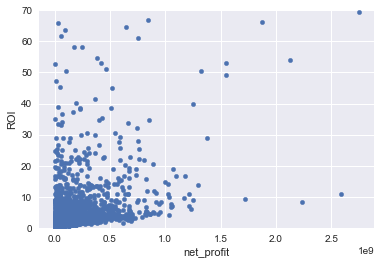

In [463]:
df_graph = df_p
df_graph.plot(x="net_profit", y="ROI", kind="scatter")

plt.ylim(0, 70)
plt.show()

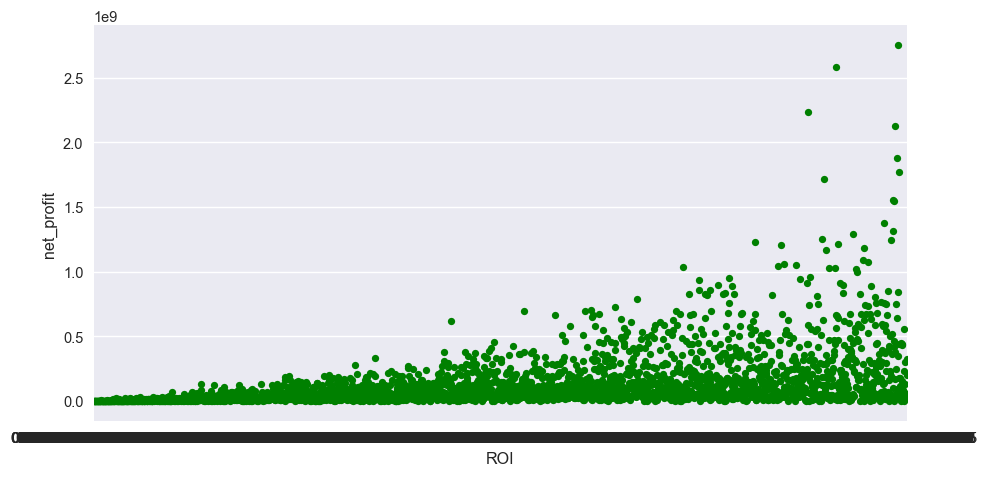

In [464]:
plt.figure(figsize=(10,5), dpi = 105)
#using seaborn to generate the plot

ax=sns.swarmplot(x=df_p['ROI'], y=df_p['net_profit'], color = 'green')

#displaying the plot
plt.show()

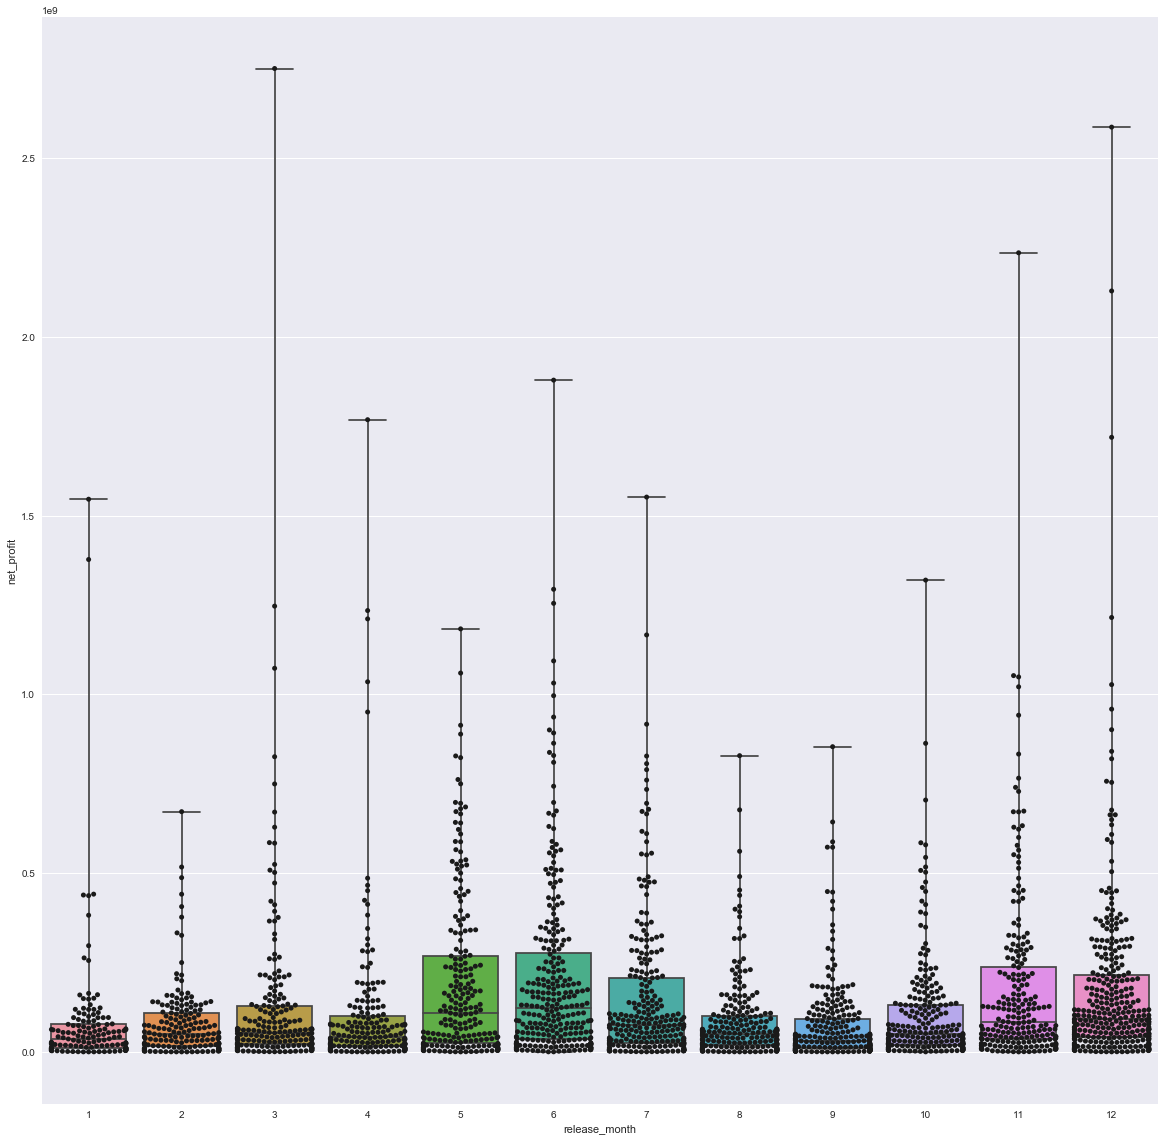

In [465]:
dims = (20, 20)
#seaborn is based off matplotlib Figure and Axis objects. So need to establish the dims in pyplot first. https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
pyplot.subplots(figsize=dims)
sns.boxplot(x=df_p['release_month'], y=df_p['net_profit'], whis=np.inf)
sns.swarmplot(x=df_p['release_month'], y=df_p['net_profit'], color=".10")

#https://seaborn.pydata.org/generated/seaborn.swarmplot.html

In [466]:
#use groupby and agg function to specify what you want displayed in the output columns for one input columnL https://stackoverflow.com/questions/32751229/pandas-sum-by-groupby-but-exclude-certain-columns
df_p.groupby('release_month').agg({'vote_average': [np.median, np.mean],'runtime': [np.median, np.mean],'net_profit':[np.median, np.mean, np.sum, np.count_nonzero], 'ROI':[np.median,np.mean]})

vote_average      runtime            net_profit                 \
                    median mean  median   mean         median           mean   
release_month                                                                  
1                     6.10 6.06   99.50 101.39  34,738,518.38  78,646,428.38   
2                     6.20 6.20  101.00 104.06  50,030,203.11  79,690,898.43   
3                     6.20 6.19  105.00 108.17  52,017,599.30 127,382,265.13   
4                     6.20 6.15  106.00 107.09  41,105,114.31 105,731,770.17   
5                     6.30 6.37  111.00 112.60 109,650,423.69 196,899,136.77   
6                     6.30 6.27  108.00 111.69 121,619,902.54 206,041,844.44   
7                     6.20 6.18  104.00 108.11  74,547,374.28 155,195,472.10   
8                     6.10 6.13  104.00 105.62  50,888,260.56  85,021,353.06   
9                     6.40 6.41  105.00 108.70  31,118,320.82  73,650,111.74   
10                    6.50 6.42  106.00 109.01  49,042,801.06 106,838,025.61   
11                    6.50 6.42  110.00 114.48  84,804,369.12 182,555,430.30   
12                    6.60 6.51  118.00 121.68  92,467,924.09 175,801,591.68   

                                                 ROI        
                            sum count_nonzero median  mean  
release_month                                               
1             11,482,378,544.01        146.00   2.18  8.55  
2             13,706,834,529.87        172.00   1.77  3.77  
3             26,113,364,351.85        205.00   1.87 10.40  
4             20,194,768,103.38        191.00   1.71  5.48  
5             43,317,810,089.85        220.00   2.16  4.22  
6             57,691,716,444.38        280.00   2.40  4.67  
7             39,574,845,386.26        255.00   2.14 45.34  
8             19,980,017,968.66        235.00   1.92  7.34  
9             19,075,378,939.78        259.00   1.64 55.18  
10            25,534,288,121.44        239.00   2.12  7.97  
11            40,709,860,957.56        223.00   2.16  4.56  
12            58,717,731,619.75        334.00   2.23  5.00

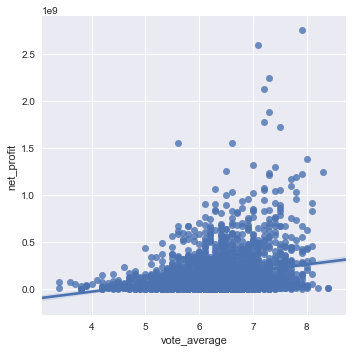

In [467]:
sns.lmplot(x='vote_average', y='net_profit', data=df_p)


(5, 8.71848455956094)

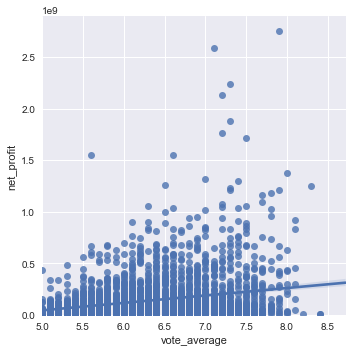

In [468]:
sns.lmplot(x='vote_average', y='net_profit', data=df_p)

# Tweak using Matplotlib
plt.ylim(1, None)
plt.xlim(5, None)

In [469]:
df_p['ROI'].corr(df_p['net_profit'])

0.02485533116998877

In [470]:
df_p['vote_average'].corr(df_p['net_profit'])

0.2574389515227323

In [471]:
df_p['popularity'].corr(df_p['net_profit'])

0.4829099923823506

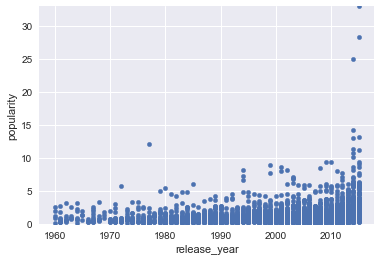

In [472]:
#check popularity over time.
df_p.plot(x="release_year", y="popularity", kind="scatter")

plt.ylim(0, 33)
plt.show()

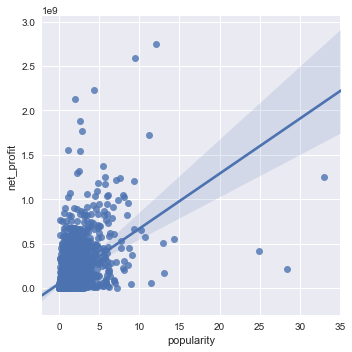

In [473]:
sns.lmplot(x='popularity', y='net_profit', data=df_p)

In [474]:
#using correlation to determine factors influencing revenues
df_p.corr(method='pearson')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,net_profit,ROI,np_rank,ROI_rank
id,1.00,0.22,0.01,0.02,-0.04,0.14,0.01,0.49,-0.09,-0.09,0.02,-0.08,-0.01,0.10,-0.01
popularity,0.22,1.00,0.45,0.59,0.23,0.77,0.31,0.21,0.41,0.51,0.03,0.48,-0.01,-0.40,-0.17
budget,0.01,0.45,1.00,0.73,0.27,0.58,0.01,0.33,0.96,0.55,0.02,0.41,-0.03,-0.45,0.17
revenue,0.02,0.59,0.73,1.00,0.27,0.73,0.19,0.20,0.70,0.89,0.04,0.84,0.01,-0.67,-0.29
runtime,-0.04,0.23,0.27,0.27,1.00,0.30,0.39,-0.11,0.35,0.31,0.19,0.27,-0.04,-0.26,0.01
vote_count,0.14,0.77,0.58,0.73,0.30,1.00,0.39,0.26,0.52,0.62,0.01,0.58,-0.00,-0.48,-0.21
vote_average,0.01,0.31,0.01,0.19,0.39,0.39,1.00,-0.14,0.03,0.24,0.14,0.26,0.00,-0.23,-0.27
release_year,0.49,0.21,0.33,0.20,-0.11,0.26,-0.14,1.00,0.15,-0.08,-0.09,-0.12,-0.00,0.11,0.20
budget_adj,-0.09,0.41,0.96,0.70,0.35,0.52,0.03,0.15,1.00,0.60,0.05,0.45,-0.04,-0.50,0.16
revenue_adj,-0.09,0.51,0.55,0.89,0.31,0.62,0.24,-0.08,0.60,1.00,0.06,0.98,0.01,-0.73,-0.38


In [475]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


### Research Question 1 - How do the 10 highest profitable movies perform in terms of ROI?

In [619]:
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,net_profit,ROI,np_rank,ROI_rank
count,"1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00"
mean,"36,903.33",1.71,111.63,887.93,6.41,"1,999.78","55,152,256.17","257,202,312.41",7.18,"202,050,056.24",22.03,879.00,879.00
std,"66,887.10",1.94,21.27,"1,139.69",0.74,12.67,"53,448,871.15","272,483,564.09",3.35,"244,508,397.47",388.91,507.35,507.35
min,11.00,0.00,26.00,10.00,3.40,"1,960.00","15,775.03","98,137.98",1.00,"81,658.21",0.31,1.00,1.00
25%,"1,817.00",0.69,96.00,184.00,5.90,"1,993.00","13,816,365.76","91,643,375.49",5.00,"67,206,687.49",2.16,440.00,440.00
50%,"9,837.00",1.21,108.00,480.00,6.40,"2,003.00","36,944,643.50","175,830,997.40",7.00,"120,946,769.74",3.44,879.00,879.00
75%,"36,658.00",2.04,123.00,"1,097.00",6.90,"2,010.00","80,959,964.38","325,209,978.49",10.00,"242,916,410.83",6.81,"1,318.00","1,318.00"
max,"417,859.00",32.99,248.00,"9,767.00",8.40,"2,015.00","368,371,256.18","2,827,123,750.41",12.00,"2,750,136,650.92","12,889.39","1,757.00","1,757.00"


In [620]:
df.nlargest(10, columns='net_profit')

,id,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,year_temp,net_profit,ROI,np_rank,ROI_rank
1329,11,tt0076759,12.04,Star Wars,121,Adventure|Action|Science Fiction,1977-03-20,4428,7.90,1977,"39,575,591.36","2,789,712,242.28",3,1977,"2,750,136,650.92",69.49,1,32
1386,19995,tt0499549,9.43,Avatar,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.10,2009,"240,886,902.89","2,827,123,750.41",12,2009,"2,586,236,847.52",10.74,2,242
5231,597,tt0120338,4.36,Titanic,194,Drama|Romance|Thriller,1997-11-18,4654,7.30,1997,"271,692,064.21","2,506,405,735.42",11,1997,"2,234,713,671.21",8.23,3,337
10594,9552,tt0070047,2.01,The Exorcist,122,Drama|Horror|Thriller,1973-12-26,1113,7.20,1973,"39,289,276.63","2,167,324,901.20",12,1973,"2,128,035,624.57",54.16,4,43
9806,578,tt0073195,2.56,Jaws,124,Horror|Thriller|Adventure,1975-06-18,1415,7.30,1975,"28,362,748.20","1,907,005,841.92",6,1975,"1,878,643,093.71",66.24,5,34
8889,601,tt0083866,2.90,E.T. the Extra-Terrestrial,115,Science Fiction|Adventure|Family|Fantasy,1982-04-03,1830,7.20,1982,"23,726,245.23","1,791,694,309.25",4,1982,"1,767,968,064.02",74.52,6,29
3,140607,tt2488496,11.17,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80",12,2015,"1,718,723,210.76",9.34,7,283
8094,1642,tt0113957,1.14,The Net,114,Crime|Drama|Mystery|Thriller|Action,1995-07-28,201,5.60,1995,"31,481,271.08","1,583,049,536.35",7,1995,"1,551,568,265.28",49.29,8,50
10110,12230,tt0055254,2.63,One Hundred and One Dalmatians,79,Adventure|Animation|Comedy|Family,1961-01-25,913,6.60,1961,"29,179,444.83","1,574,814,739.70",1,1961,"1,545,635,294.87",52.97,9,45
7309,1891,tt0080684,5.49,The Empire Strikes Back,124,Adventure|Action|Science Fiction,1980-01-01,3954,8.00,1980,"47,628,661.55","1,424,626,187.77",1,1980,"1,376,997,526.22",28.91,10,79


The above indicates that these highly profitable movies return strong ROIs - all are in the top 25% (> 6.81) for `ROI`. However, they aren't the highest ranking in terms of `ROI_rank`, and three of the movies aren't in the top 200 in terms of rank. The three that aren't had the three largest movie inflation adjusted budgets and also are the three latest movies released in the top 10. Perhaps this is suggesting that  movies of late are requiring large budgets to achieve higher net profits at the expense of ROI?

Notably many of the movies in the top 10  were all considered innovative films of its time. Star Wars, The Exorcist, Jaws and E.T were movies were so original and nothing released prior had come close to enthralling audiences with horror, suspense, special effects, etc. Avatar is also in the same vein with its innovative use of 3D technology and computer graphics.

### Research Question 2 - How do the 10 highest ROI movies perform in terms of profitability?

In [621]:
df.nlargest(10, columns='ROI')

,id,imdb_id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,year_temp,net_profit,ROI,np_rank,ROI_rank
7447,23827,tt1179904,1.12,Paranormal Activity,86,Horror|Mystery,2007-09-14,714,6.10,2007,"15,775.03","203,346,220.13",9,2007,"203,330,445.10","12,889.39",532,1
2449,2667,tt0185937,0.93,The Blair Witch Project,81,Horror|Mystery,1999-07-14,522,6.30,1999,"32,726.32","324,645,105.96",7,1999,"324,612,379.63","9,919.00",310,2
1354,985,tt0074486,0.33,Eraserhead,89,Science Fiction|Fantasy|Horror|Drama,1977-03-19,194,7.10,1977,"35,977.81","25,184,467.23",3,1977,"25,148,489.42",699.00,1614,3
7277,692,tt0069089,0.41,Pink Flamingos,93,Comedy,1972-03-12,51,6.30,1972,"62,574.73","31,287,365.59",3,1972,"31,224,790.86",499.00,1583,4
7178,9372,tt0390521,0.26,Super Size Me,100,Documentary|Comedy|Drama,2004-01-17,295,6.50,2004,"75,038.95","32,988,367.35",1,2004,"32,913,328.40",438.62,1569,5
242,299245,tt2309260,0.53,The Gallows,87,Horror|Thriller,2015-07-10,247,5.00,2015,"91,999.96","39,251,239.93",7,2015,"39,159,239.97",425.64,1526,6
7057,83,tt0374102,0.76,Open Water,79,Drama|Thriller,2004-08-06,171,5.30,2004,"150,077.90","63,111,168.01",8,2004,"62,961,090.11",419.52,1367,7
9762,30497,tt0072271,0.91,The Texas Chain Saw Massacre,83,Horror|Thriller,1974-10-01,249,6.80,1974,"375,894.13","136,467,258.52",10,1974,"136,091,364.39",362.05,778,8
7827,9659,tt0079501,2.01,Mad Max,93,Adventure|Action|Thriller|Science Fiction,1979-04-12,667,6.50,1979,"1,201,821.60","300,455,400.25",4,1979,"299,253,578.65",249.00,347,9
10759,948,tt0077651,1.20,Halloween,91,Horror|Thriller,1978-10-25,522,7.30,1978,"1,002,810.21","233,989,048.64",10,1978,"232,986,238.44",232.33,458,10


The above indicates that these movies with high `ROI` aren't necessarily the best performers for `net_profit` - they don't even feature in the top 300 for highest profitable movies. However, their net profit returns are very impressive considering the level of investment. The top two with stratospheric success, Paranormal Activity (mostly recorded with a series of cameras around a house) and The Blair Witch Project (fictional documentary film) were both very original films. The same could be said for Super Size Me (a documentary type film of a person eating McDonalds everyday for 30 days). 

Six of the top ten films are also original low budget horrors - Paranormal Activity, The Blair Witch Project, Eraserhead, The Gallows, The Texas Chain Saw Massacre and Halloween.

There is definitely a theme of 'originality' to both ROI and net profitability here.

### Research Question 3 - When during the year are the most profitable movies released?



No     1257
Yes     500
Name: ROI_top, dtype: int64

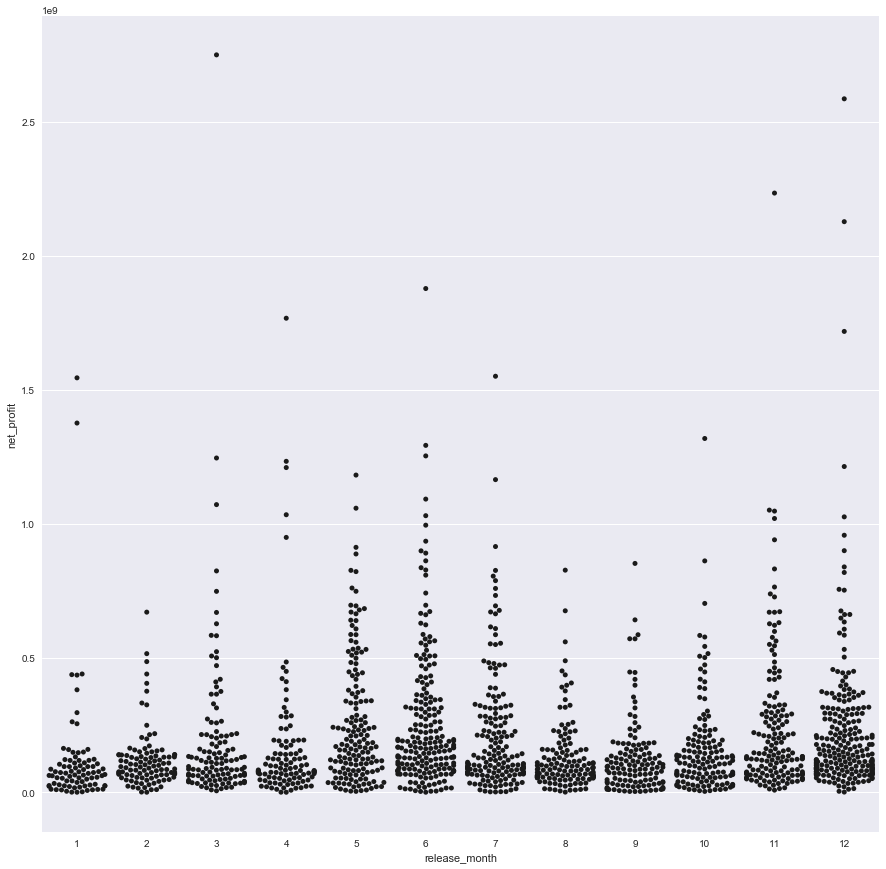

In [666]:
dims = (15, 15)
pyplot.subplots(figsize=dims)
sns.swarmplot(x=df['release_month'], y=df['net_profit'], color=".1")


The swarmplot indicates that the most popular months for the release of profitable movies are May, June, July, November and December. These months also have a higher proportion of extremely profitable movies ($0.5b+ net profit).

In [658]:
# statistics by release_month
df.groupby('release_month').agg({'vote_average': [np.median, np.mean],'runtime': [np.median, np.mean],'net_profit':[np.median, np.mean, np.sum, np.count_nonzero], 'ROI':[np.median,np.mean]})

vote_average      runtime            net_profit                 \
                    median mean  median   mean         median           mean   
release_month                                                                  
1                     6.10 6.02   99.00  99.14  70,320,412.92 123,742,834.25   
2                     6.20 6.27  100.00 103.05  94,658,130.75 121,611,048.16   
3                     6.30 6.29  106.00 108.16 109,569,752.07 201,030,727.94   
4                     6.30 6.30  107.00 109.09  83,152,863.49 173,909,005.08   
5                     6.40 6.45  113.00 114.52 182,294,701.12 265,182,138.10   
6                     6.40 6.37  109.00 112.79 175,177,031.36 268,798,093.42   
7                     6.40 6.36  108.00 110.20 127,097,522.21 218,775,780.76   
8                     6.30 6.28  103.00 106.15  88,104,841.72 131,083,844.47   
9                     6.60 6.57  107.00 109.80  95,509,150.00 131,388,425.63   
10                    6.60 6.57  106.50 108.90 115,903,626.66 164,307,964.93   
11                    6.60 6.52  110.00 115.24 144,582,540.85 244,664,805.88   
12                    6.70 6.61  121.00 123.98 147,772,055.75 236,576,725.97   

                                                 ROI         
                            sum count_nonzero median   mean  
release_month                                                
1             10,270,655,243.11         83.00   4.27  14.40  
2             12,404,326,912.50        102.00   3.40   5.89  
3             24,123,687,353.30        120.00   3.35  17.27  
4             18,608,263,544.02        107.00   3.44   9.17  
5             42,163,959,957.60        159.00   3.44   5.55  
6             55,910,003,431.58        208.00   3.37   6.03  
7             37,848,210,070.63        173.00   3.33  66.47  
8             17,958,486,692.88        137.00   3.31  12.02  
9             16,686,330,054.56        127.00   4.41 111.66  
10            23,331,731,020.74        142.00   3.70  12.84  
11            39,391,033,747.32        161.00   3.21   6.03  
12            56,305,260,780.02        238.00   3.14   6.73

The summary numbers above support the observations in the swarmplot. It's clear outliers are causing large discrepancies between the median and mean figures as well, so I will talk in terms of the median. 

The ROI median indicates that those movies with a high ROI (at least 5.0) are January, August, September and October. These are typically quieter months compared to the months with the release of profitable movies. It is hard to explain why this might be the case. Seasonal factors (winter) and competition, other popular past time activities (sporting events) and lack of national holidays during these months might conspire against production companies looking to profit on a big blockbuster movie or high quality film.  There there is less competition in these months and there would be less choices for moviegoers so this increases the return for movies. 

There is also a noticeable increase in the runtime mean and median in December. 

In [685]:
#import calendar
#df['release_month'] = df['release_month'].apply(int) 
#df['release_month'] = df['release_month'].apply(lambda x: calendar.month_name[x])

def compare(ROI_test):
    flag = 'No'
    if ROI_test >= df['ROI'].quantile(0.75):
        flag = 'Yes'   
    return flag

df['ROI_top'] = df['ROI']
df['ROI_top'] = df['ROI_top'].apply(lambda x: compare(x))
df['ROI_top'].value_counts()

No     1317
Yes     440
Name: ROI_top, dtype: int64

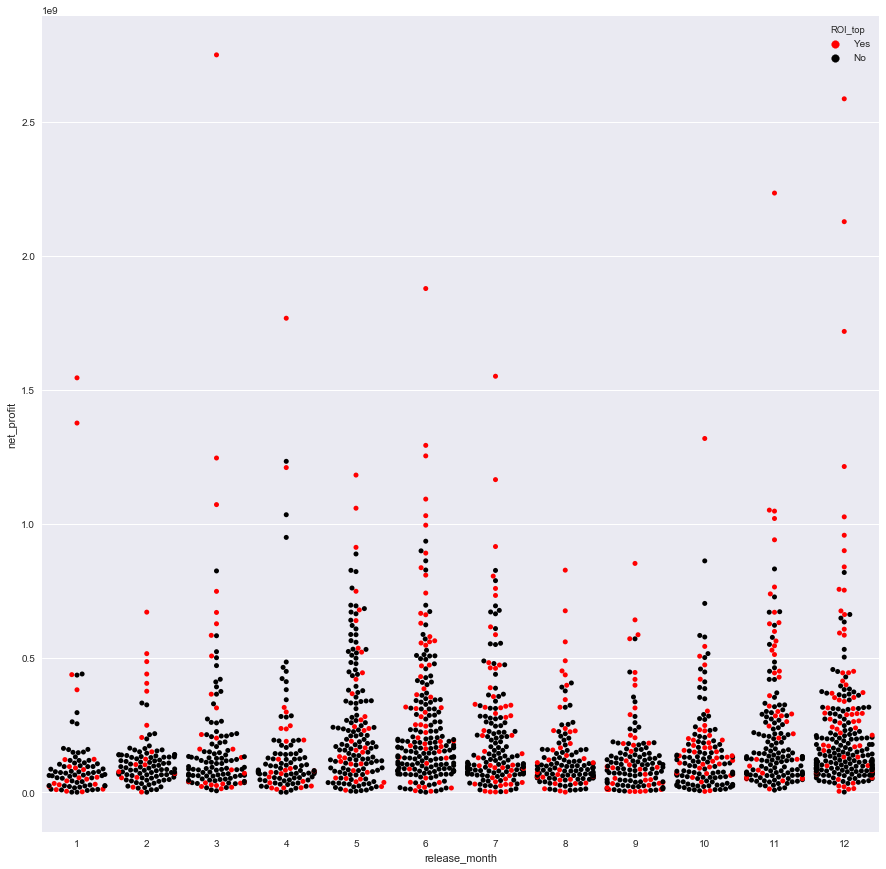

In [688]:
dims = (15, 15)
pyplot.subplots(figsize=dims)
sns.swarmplot(x=df['release_month'], y=df['net_profit'], hue=df['ROI_top'], color=".1", palette=dict(No = 'black', Yes = 'red'))

In [678]:
# General statistics
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,net_profit,ROI,np_rank,ROI_rank
count,"1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00","1,757.00"
mean,"36,903.33",1.71,111.63,887.93,6.41,"1,999.78","55,152,256.17","257,202,312.41",7.18,"202,050,056.24",22.03,879.00,879.00
std,"66,887.10",1.94,21.27,"1,139.69",0.74,12.67,"53,448,871.15","272,483,564.09",3.35,"244,508,397.47",388.91,507.35,507.35
min,11.00,0.00,26.00,10.00,3.40,"1,960.00","15,775.03","98,137.98",1.00,"81,658.21",0.31,1.00,1.00
25%,"1,817.00",0.69,96.00,184.00,5.90,"1,993.00","13,816,365.76","91,643,375.49",5.00,"67,206,687.49",2.16,440.00,440.00
50%,"9,837.00",1.21,108.00,480.00,6.40,"2,003.00","36,944,643.50","175,830,997.40",7.00,"120,946,769.74",3.44,879.00,879.00
75%,"36,658.00",2.04,123.00,"1,097.00",6.90,"2,010.00","80,959,964.38","325,209,978.49",10.00,"242,916,410.83",6.81,"1,318.00","1,318.00"
max,"417,859.00",32.99,248.00,"9,767.00",8.40,"2,015.00","368,371,256.18","2,827,123,750.41",12.00,"2,750,136,650.92","12,889.39","1,757.00","1,757.00"


In [679]:
df['ROI'].quantile(0.75)

6.809955299999994

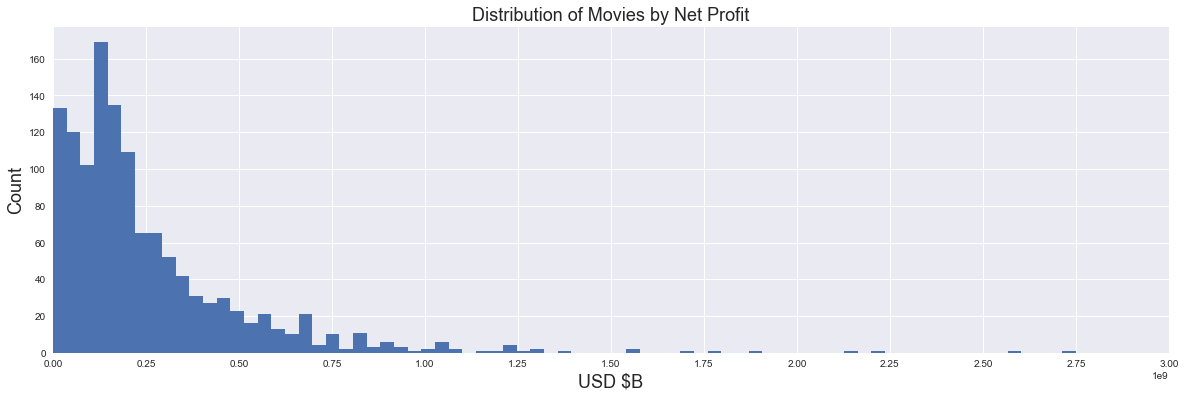

In [309]:
# Check distribution of net profit

# Use seaborn
sns.set()

x = df['net_profit']
plt.subplots(figsize=(20, 6))
plt.title('Distribution of Movies by Net Profit', fontsize=18)
plt.hist(x, bins=75) 
plt.xlabel('USD $B', fontsize=18)
plt.ylabel('Count', fontsize=18)

# Set max and min x-axis
plt.xlim(0, 2800000000)

# Add extra x-axis tick marks
extraticks=[250000000, 750000000, 1250000000, 1750000000, 2250000000, 2750000000]
plt.xticks(list(plt.xticks()[0]) + extraticks)
plt.show()

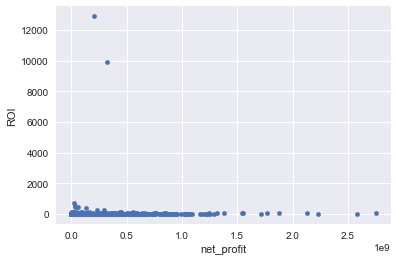

In [694]:
df_graph = df_p
df_graph.plot(x="net_profit", y="ROI", kind="scatter")

#plt.ylim(0, 70)
plt.show()

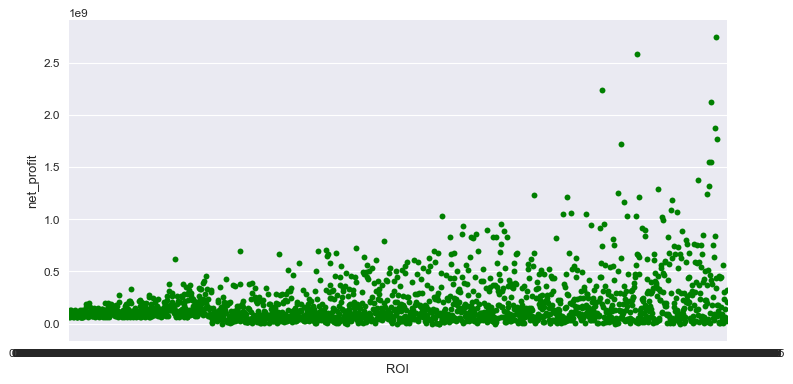

In [695]:
# Visualisation - ROI vs net_profit

plt.figure(figsize=(10,5), dpi = 85)
#using seaborn to generate the plot

sns.swarmplot(x=df['ROI'], y=df['net_profit'], color = 'green')

#displaying the plot
plt.show()

### Research Question 4 - How has movie popularity changed over the years?

It is assumed that a higher popularity score translates to greater interest for a movie. According to how the Popularity Score is [calculated](https://developers.themoviedb.org/3/getting-started/popularity) by TMDb, it seems it is based on a combination of a number of factors - votes for the day, views for the day, how many users have marked it as a "favourite" for the day, number of users who added it to their "watchlist". Immediately this raises concerns whether this score is actually legitimate - how could a movie before the internet age have this metric calculated fairly compared to movies released within the last 10 years? 

Further to this, the results seem to be based on traffic TMDb has logged through their information capturing mechanisms. It's not clear how this is managed. If it's just traffic through their website, what about viewers who do not use their website? And we don't know how reliable these scores are as there is no data available on the volumes of data points that make up the score. 

In any case, let's see how the results look. 


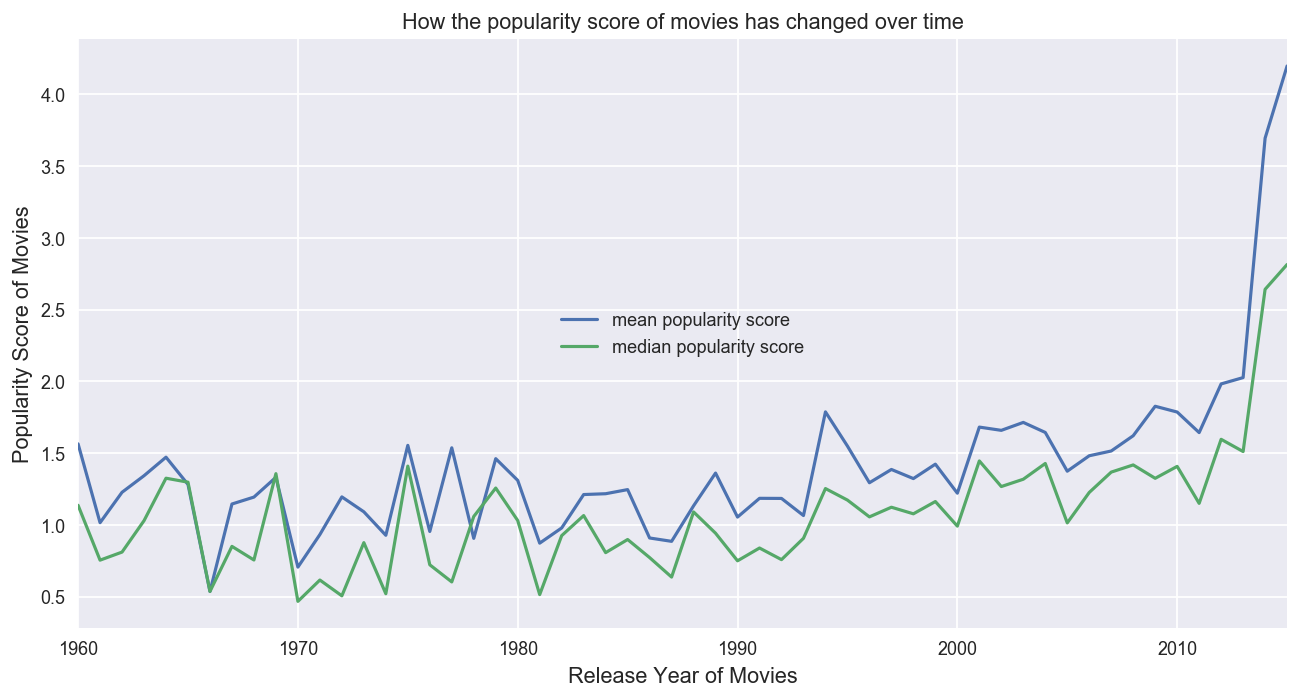

In [742]:
# Set dataframe filters for mean and median
popyear_mean = df.groupby('release_year')['popularity'].mean()
popyear_median = df.groupby('release_year')['popularity'].median()

# Figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

# Label x-axis
plt.xlabel('Release Year of Movies', fontsize = 12)

# Label y-axis
plt.ylabel('Popularity Score of Movies', fontsize = 12)

plt.xlim(1960, 2015)

# Graph title
plt.title('How the popularity score of movies has changed over time')

# Plotting graphs
plt.plot(popyear_mean, label='mean popularity score')
plt.plot(popyear_median, label='median popularity score')

# Display the legend and show graph
plt.legend(loc='center')
plt.show()

The above graph illustrates that the mean and median popularity scores for movies is increasing over time. Of note are the increasingly higher scores since 2000 and the sudden jump from 2011 onwards. This seems to support my theory that the score favours movies released recently due to data more available. Because of this bias it is probably not worthwhile using this metric.   


### Research Question 5 - How has the average vote rating changed over the years?

Hopefully this measure is more feasible than popularity. It is assumed this is rating out of 10, with 10 being highly favourible and 0 being least favourible on a spectrum. 

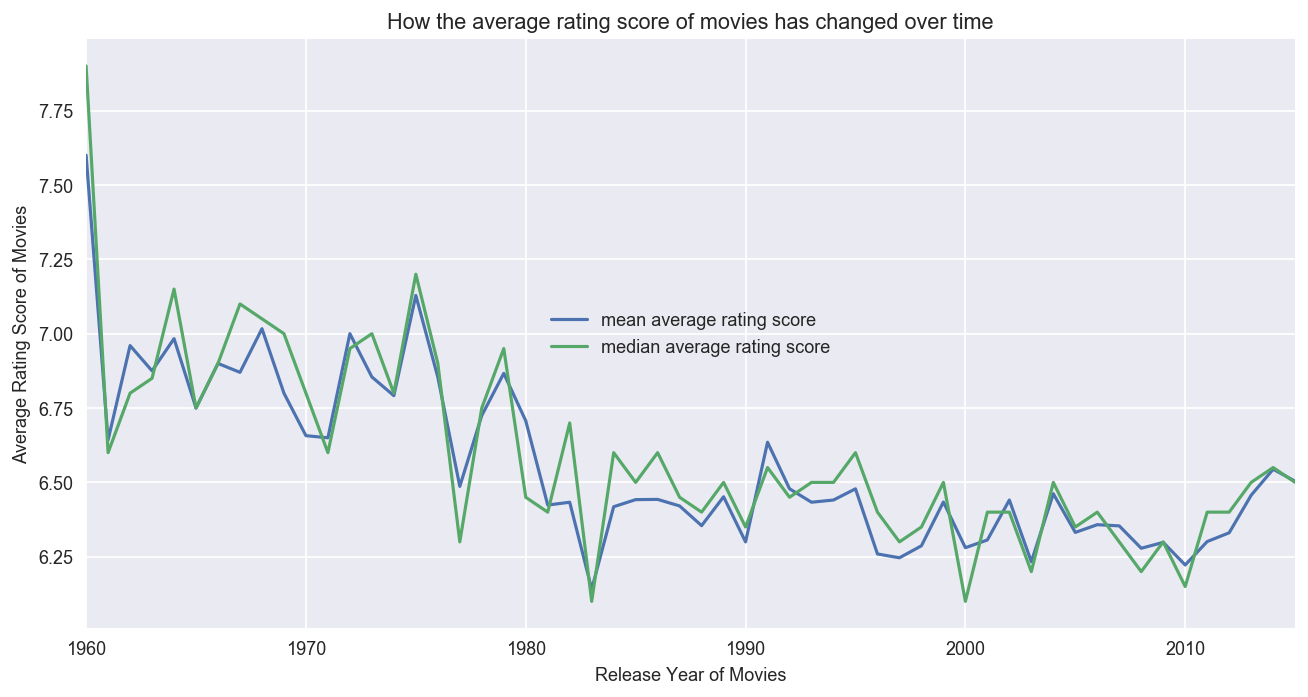

In [741]:
# Set dataframe filters for mean and median
voteyear_mean = df.groupby('release_year')['vote_average'].mean()
voteyear_median = df.groupby('release_year')['vote_average'].median()

# Figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

# Label x-axis
plt.xlabel('Release Year of Movies', fontsize = 10)

# Label y-axis
plt.ylabel('Average Rating Score of Movies', fontsize = 10)

plt.xlim(1960, 2015)

# Graph title
plt.title('How the average rating score of movies has changed over time')

# Plotting graphs
plt.plot(voteyear_mean, label='mean average rating score')
plt.plot(voteyear_median, label='median average rating score')

# Display the legend and show graph
plt.legend(loc='center')
plt.show()


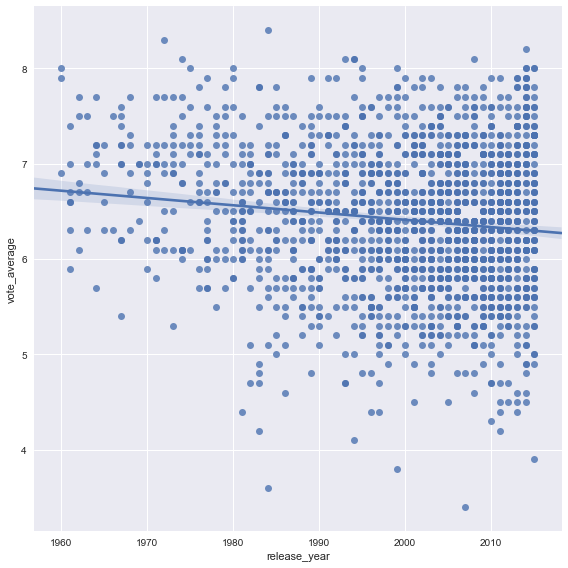

In [753]:
# let's see this with a trendline
sns.lmplot(x='release_year', y='vote_average', data=df, size=8)

In [750]:
# get the correlation coefficient between vote_average and release_year.
df['vote_average'].corr(df_p['release_year'])

-0.13003406717447344

The above graphs definitely visually represent a minor downward trend with the average rating score of movies through the passage of time. This is also reflected by -0.13 correlation score.

In [751]:
# check the number of votes
df['vote_count'].describe()

count   1,757.00
mean      887.93
std     1,139.69
min        10.00
25%       184.00
50%       480.00
75%     1,097.00
max     9,767.00
Name: vote_count, dtype: float64

The number of votes seems to be reasonable in the scheme of things- more than 25% of movies had at least 184 votes to generate the average rating scores. So on this basis, I think it is reasonable to use this for our analysis on whether there is correlation with the financial variables (budget_adj, revenue_adj, net_profit and ROI).

### Research Question 6 - What is the correlation between the financial variables and vote_average?

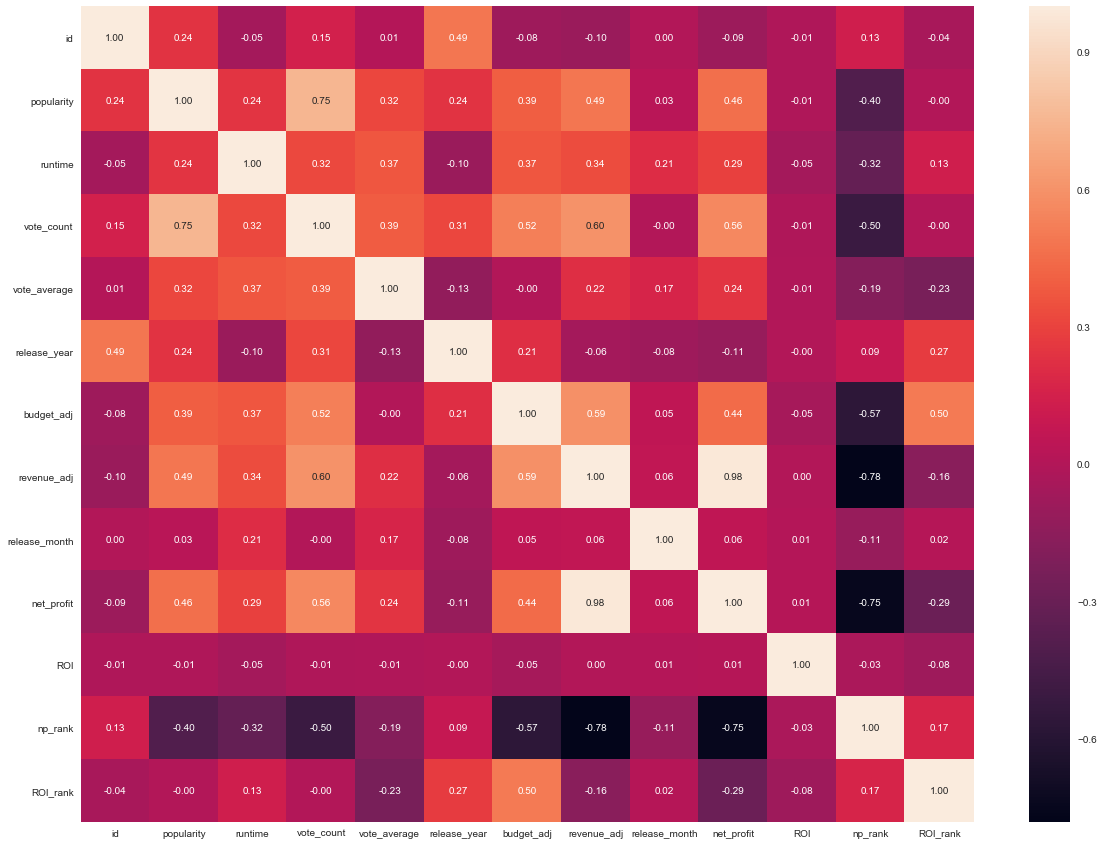

In [749]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt=".2f")

There are weak correlation scores between the vote_average and the revenue_adj (0.22) and net_profit (0.24). This could suggest that collecting average rating scores from movie test screenings might not be as beneficial for predicting commercial success as people believe because the correlation is weak.

There is virtually no correlation between budget_adj and ROI. 

There is a moderate correlation between revenue_adj and budget_adj. The assumption that to make lots of money you need spend lots of money may hold here.

It is difficult to say what these correlations could mean without further testing and analysis. There are many factors that can influence the level of commercial success a movie could have that we have not covered - the cast, the director, the production company, the genre, etc.




<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

The dataset was filtered to focus on the top 50% movies that were the most profitable or had the highest ROI. From this subset, it was found that:
1. Movies that were in the top 10 for net profit were all high ROIs. However, they were outside of the the top 30 for ROI.
2. A movie with a high ROI is least likely to have a \$1b net profit.
3. Originality and the ability to 'wow' audiences with an experience they have not seen or felt seems to be a common theme for highly profitable movies in the top 10 for net profit and ROI no matter their budget.
4. May, June, July, November and December are popular months to release highly profitable movies due to...
5. Movies with high ROI (at least 5 times) seem to be released in the quieter months of January, August, September and October.
6. There is a moderate correlation between revenue_adj and budget_adj.
7. There is a weak correlation between average rating score and revenue_adj and net_profit








Limitations:
1. Could not say with absolute confidence the data is correct in the dataset. The financial data seems to have quite a few inconsistencies. It is possible that a lot of movies that generated profits have been excluded.
2. Not enough information was available on popularity score to determine how it was derived. It could have been useful measure to find correlations against other variables.
3. Generally only the numerical values were used. Cast, directors, etc were not considered to predict financial success.
